In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Load dataset
data = pd.read_csv('/content/dataset.csv')
data.shape

(303, 14)

In [ ]:
# Display first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check for missing values
print("Missing values:", data.isnull().sum().sum())

Missing values: 0


In [ ]:
# Exploratory Data Analysis (EDA)
print("Dataset shape:", data.shape)
print("Data types:\n", data.dtypes)
print("Target variable distribution:\n", data['target'].value_counts())

Dataset shape: (303, 14)
Data types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Target variable distribution:
 target
1    165
0    138
Name: count, dtype: int64


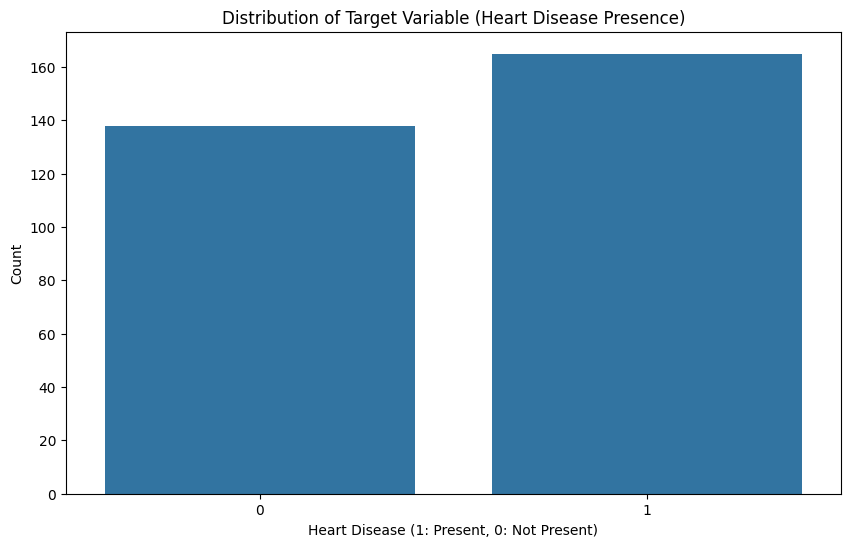

In [ ]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title("Distribution of Target Variable (Heart Disease Presence)")
plt.xlabel("Heart Disease (1: Present, 0: Not Present)")
plt.ylabel("Count")
plt.show()

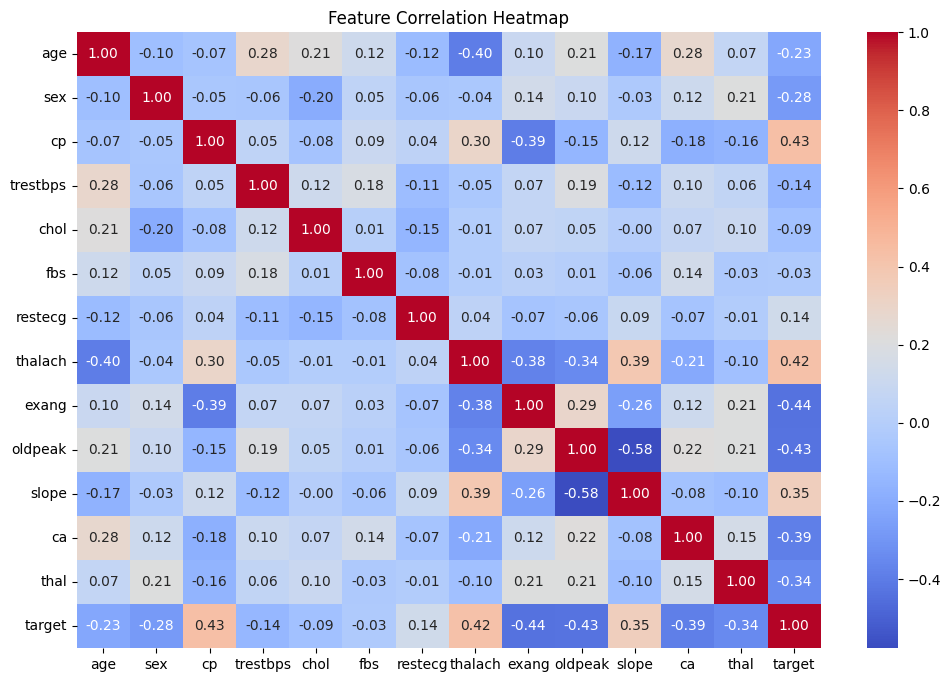

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

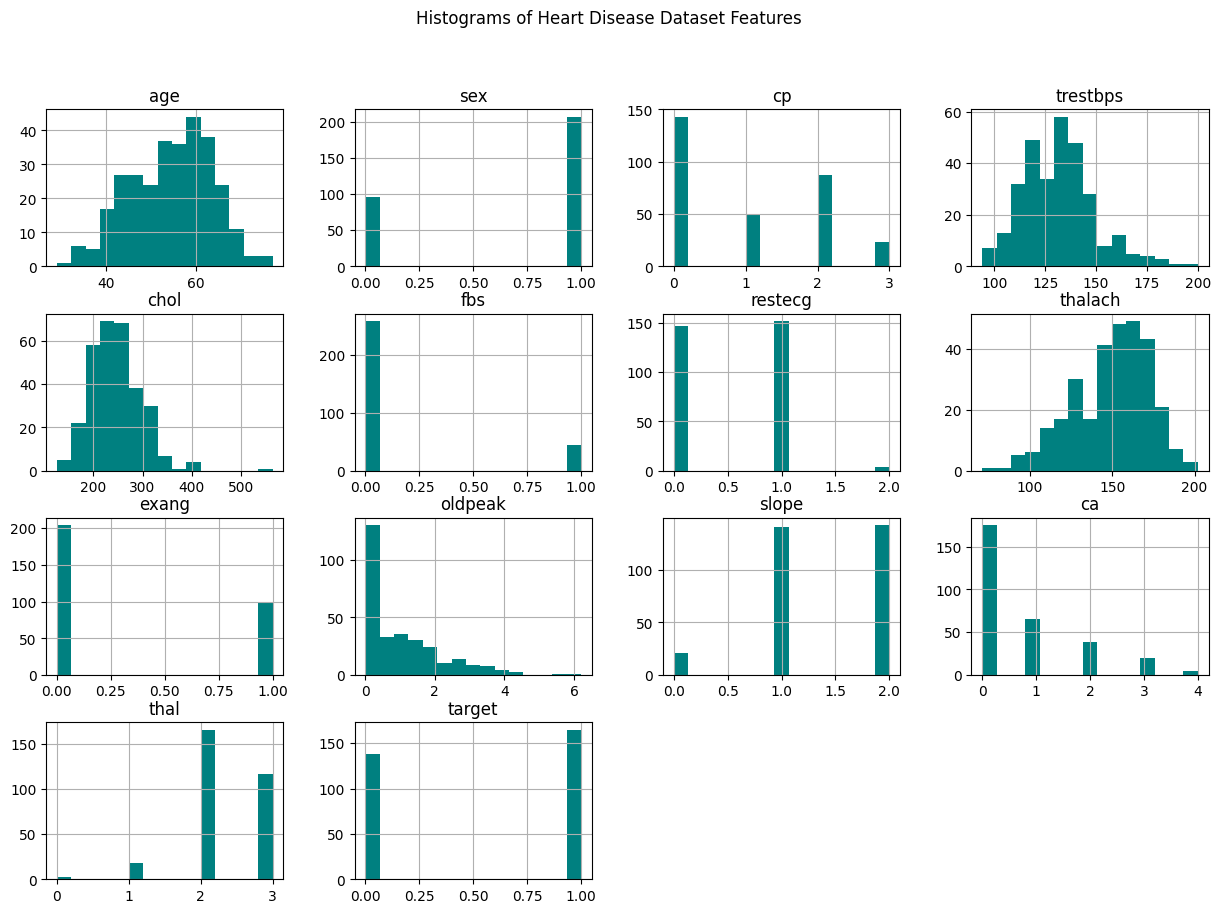

In [ ]:
# Histograms for each feature
data.hist(bins=15, figsize=(15, 10), color='teal')
plt.suptitle("Histograms of Heart Disease Dataset Features")
plt.show()

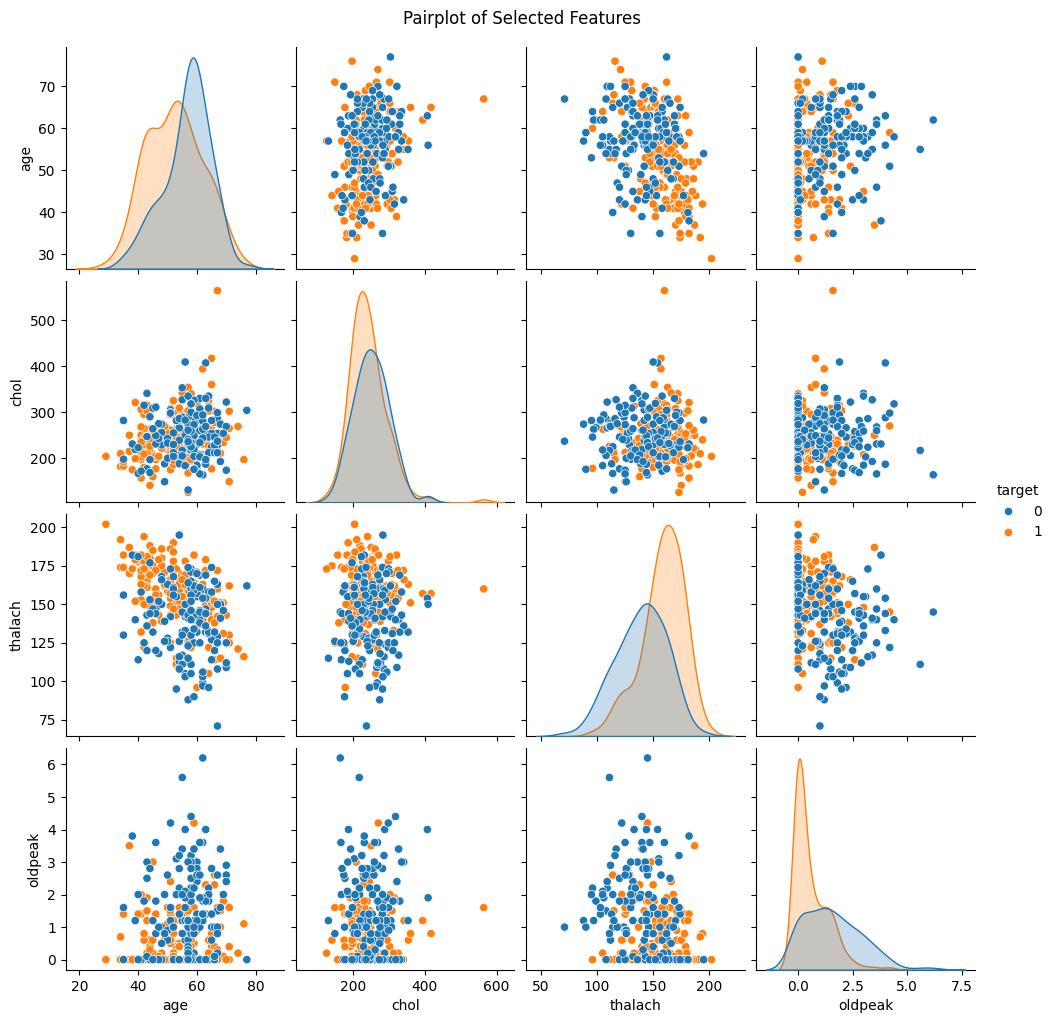

In [ ]:
# Pairplot for select features
sns.pairplot(data[['age', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

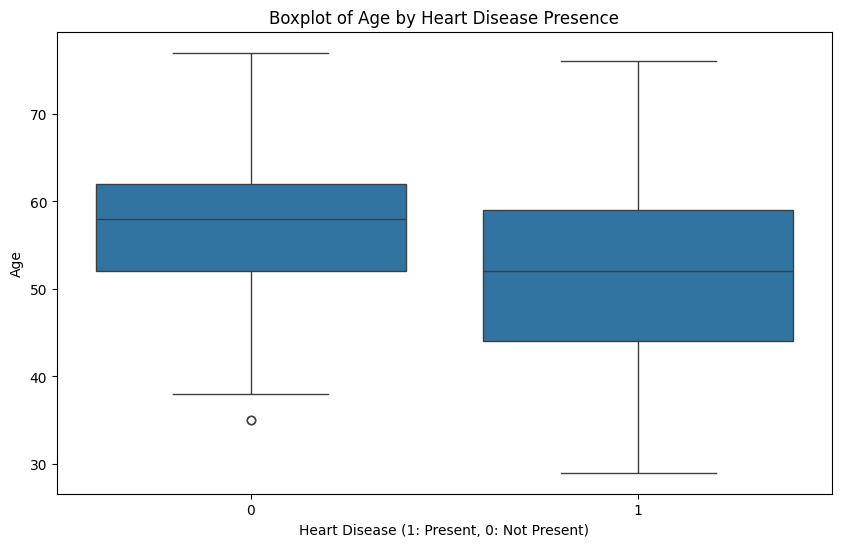

In [ ]:
# Boxplot of age vs. target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title("Boxplot of Age by Heart Disease Presence")
plt.xlabel("Heart Disease (1: Present, 0: Not Present)")
plt.ylabel("Age")
plt.show()

In [ ]:
# Splitting the dataset into features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}


Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



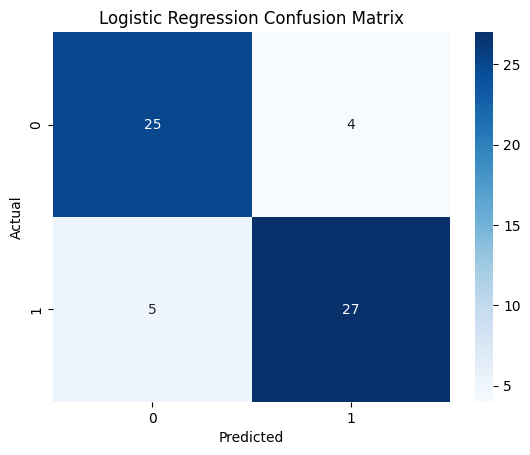


Random Forest Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



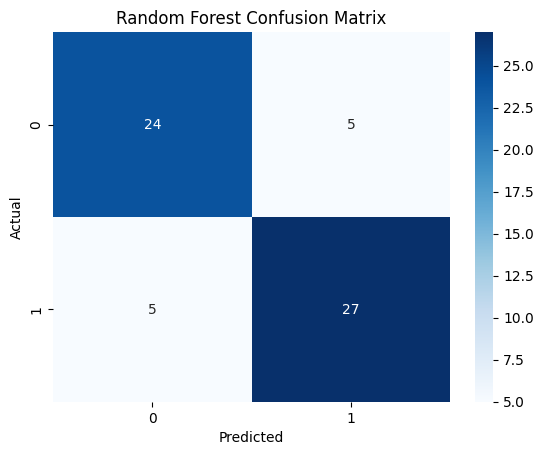


SVM Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



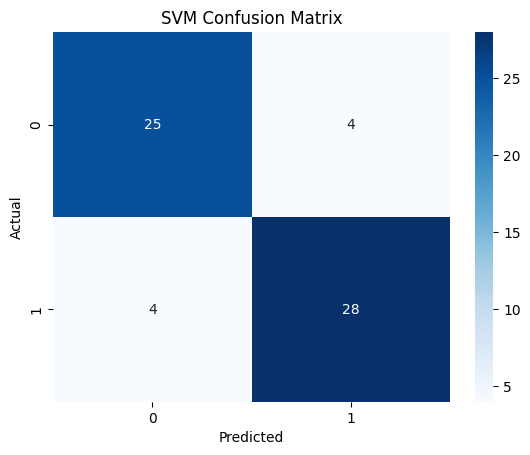

In [28]:
# Initialize a list to store the model names and their accuracies
model_names = []
accuracies = []

# Training, predicting, and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the model name and accuracy
    model_names.append(model_name)
    accuracies.append(accuracy)

    print(f"\n{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    # Plotting confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


<ipython-input-29-93513f3c0d0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


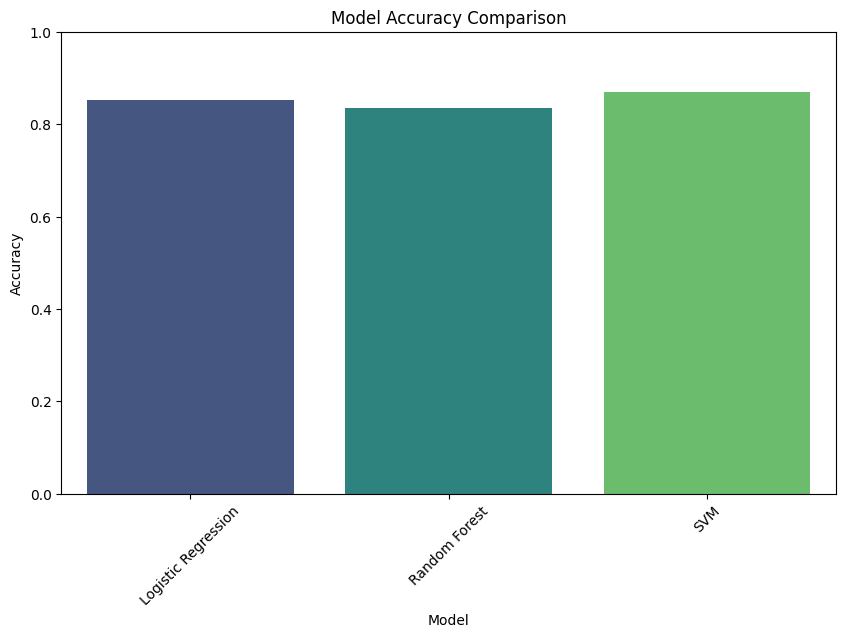

In [29]:

# Plotting the accuracy comparison bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for better visualization
plt.xticks(rotation=45)
plt.show()